

# Exploring Data , Nepal Daily Climate Change 


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
#Load the datasets 
df = pd.read_csv('/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/sampled_dataset.csv')

In [17]:
# Basics of datasets 
print(df.shape)
df.head()

(24180, 25)


,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m,Year,Month,YearMonth
0,1981-07-13,Arghakhanchi,27.9,83.2,5.29,92.49,18.42,75.85,27.02,22.28,...,4.63,0.37,4.26,2.53,5.06,0.58,4.47,1981,7,1981-07
1,1981-02-03,Arghakhanchi,27.9,83.2,0.01,93.86,4.86,48.91,12.96,2.26,...,4.02,0.65,3.36,2.80,4.24,0.78,3.46,1981,2,1981-02
2,1981-01-16,Arghakhanchi,27.9,83.2,0.00,94.17,3.98,37.51,14.03,-0.33,...,2.92,0.77,2.15,2.06,2.71,0.81,1.90,1981,1,1981-01
3,1981-11-06,Arghakhanchi,27.9,83.2,0.00,93.50,8.96,64.82,18.01,11.07,...,2.84,0.88,1.96,2.12,3.02,1.24,1.77,1981,11,1981-11
4,1981-02-27,Arghakhanchi,27.9,83.2,0.00,93.36,5.29,34.32,19.76,3.47,...,5.24,0.81,4.43,4.11,6.29,0.94,5.35,1981,2,1981-02


In [18]:
#Understanding data in general:
print("Number and Name of columns:")
print(len(df.columns))
print(df.columns)



Number and Name of columns:
25
Index(['Date', 'District', 'Latitude', 'Longitude', 'Precip', 'Pressure',
       'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m', 'MaxTemp_2m',
       'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp', 'WindSpeed_10m',
       'MaxWindSpeed_10m', 'MinWindSpeed_10m', 'WindSpeedRange_10m',
       'WindSpeed_50m', 'MaxWindSpeed_50m', 'MinWindSpeed_50m',
       'WindSpeedRange_50m', 'Year', 'Month', 'YearMonth'],
      dtype='object')


In [19]:
#Basic stats and datasets exploration 
print("Datasets Infromation and Datatypes: ")
print(df.info())

# Statistics 
print("Statistics of Climate Data: ")
print(df.describe())



Datasets Infromation and Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                24180 non-null  object 
 1   District            24180 non-null  object 
 2   Latitude            24180 non-null  float64
 3   Longitude           24180 non-null  float64
 4   Precip              24180 non-null  float64
 5   Pressure            24180 non-null  float64
 6   Humidity_2m         24180 non-null  float64
 7   RH_2m               24180 non-null  float64
 8   Temp_2m             24180 non-null  float64
 9   WetBulbTemp_2m      24180 non-null  float64
 10  MaxTemp_2m          24180 non-null  float64
 11  MinTemp_2m          24180 non-null  float64
 12  TempRange_2m        24180 non-null  float64
 13  EarthSkinTemp       24180 non-null  float64
 14  WindSpeed_10m       24180 non-null  float64
 15  MaxWindSpeed_10m

In [20]:
# Checking Null and Missing Values 
print(df.isnull().sum())

Date                  0
District              0
Latitude              0
Longitude             0
Precip                0
Pressure              0
Humidity_2m           0
RH_2m                 0
Temp_2m               0
WetBulbTemp_2m        0
MaxTemp_2m            0
MinTemp_2m            0
TempRange_2m          0
EarthSkinTemp         0
WindSpeed_10m         0
MaxWindSpeed_10m      0
MinWindSpeed_10m      0
WindSpeedRange_10m    0
WindSpeed_50m         0
MaxWindSpeed_50m      0
MinWindSpeed_50m      0
WindSpeedRange_50m    0
Year                  0
Month                 0
YearMonth             0
dtype: int64


In [21]:
Q1 = df['Precip'].quantile(0.25)
Q3 = df['Precip'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Precip'] < Q1 - 1.5 * IQR) | (df['Precip'] > Q3 + 1.5 * IQR)]
print("Rainfall Outliers:")
print(outliers[['Date', 'District', 'Precip']])


Rainfall Outliers:
             Date      District  Precip
0      1981-07-13  Arghakhanchi    5.29
5      1981-07-03  Arghakhanchi   44.98
10     1981-07-13       Baglung    3.38
15     1981-07-03       Baglung   38.78
20     1981-07-13       Baitadi    6.53
...           ...           ...     ...
24167  2019-04-30     Terhathum    4.04
24168  2019-06-02     Terhathum    3.74
24170  2019-07-13      Udayapur   44.67
24174  2019-02-27      Udayapur    5.50
24178  2019-06-02      Udayapur    3.42

[3823 rows x 3 columns]


## Viusalization and Analysis to Understand Variables

In [22]:
# Top Hottest and Coldest Days 
#Top 5 hottest days 
df[['Date', 'District', 'MaxTemp_2m']].sort_values(by = 'MaxTemp_2m', ascending = False).head()

#Top 5 Coldest days
df[['Date', 'District', 'MinTemp_2m']].sort_values(by = 'MinTemp_2m', ascending = True).head()

,Date,District,MinTemp_2m
2692,1985-01-16,Humla,-31.58
5172,1989-01-16,Humla,-28.00
2842,1985-01-16,Mugu,-27.70
18812,2011-01-16,Humla,-27.51
4552,1988-01-16,Humla,-26.69


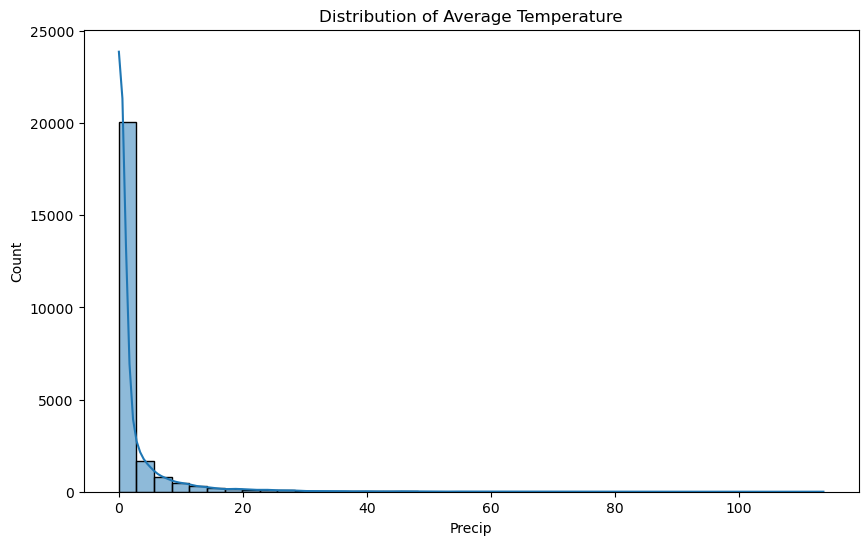

In [23]:
# Precipitation Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df['Precip'], bins = 40, kde = True)
plt.title ("Distribution of Average Temperature")
plt.show()


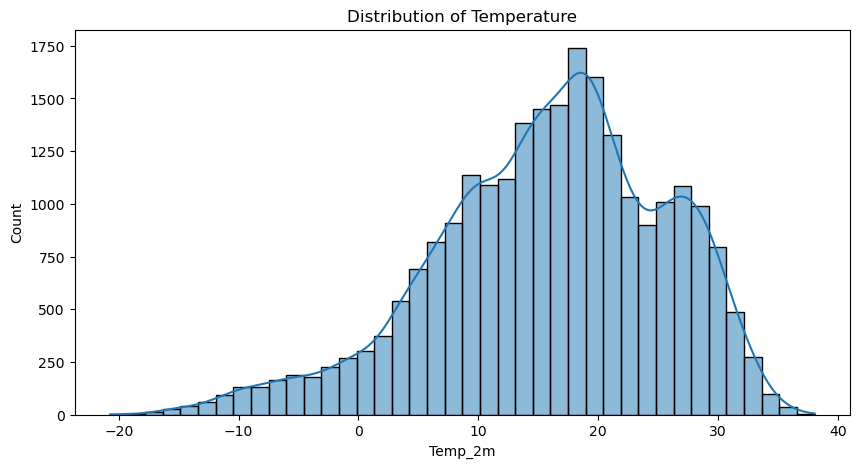

In [24]:
# Distribution of Temperature 
plt.figure(figsize=(10, 5))
sns.histplot(df['Temp_2m'], bins = 40, kde = True)
plt.title("Distribution of Temperature")
plt.show()

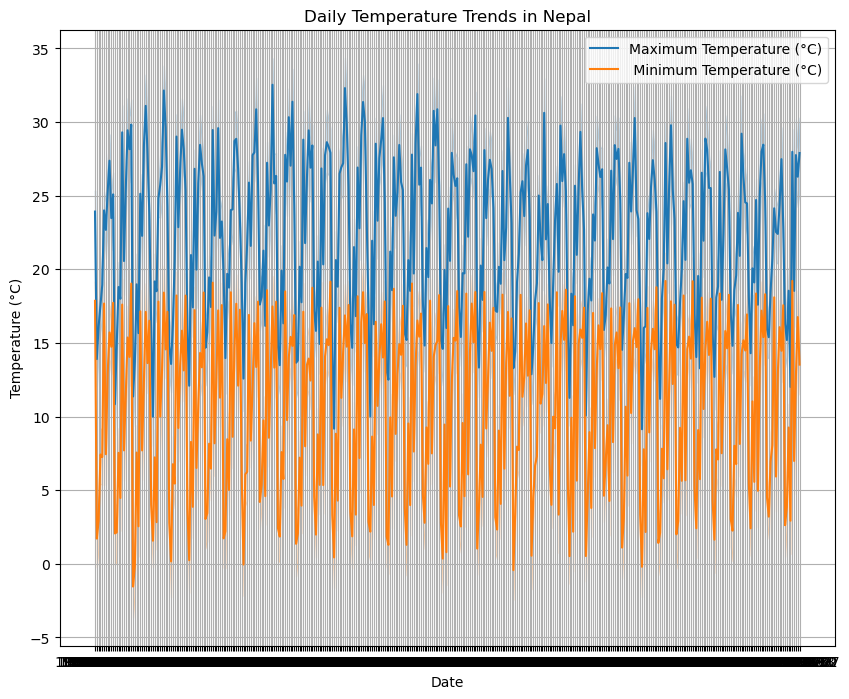

In [25]:
# Trend of Temperature Visualization
plt.figure(figsize=(10, 8))
sns.lineplot(data= df, x = 'Date', y='MaxTemp_2m', label= 'Maximum Temperature (°C)')
sns.lineplot(data = df, x = 'Date', y ='MinTemp_2m', label = ' Minimum Temperature (°C)')
plt.title("Daily Temperature Trends in Nepal")
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


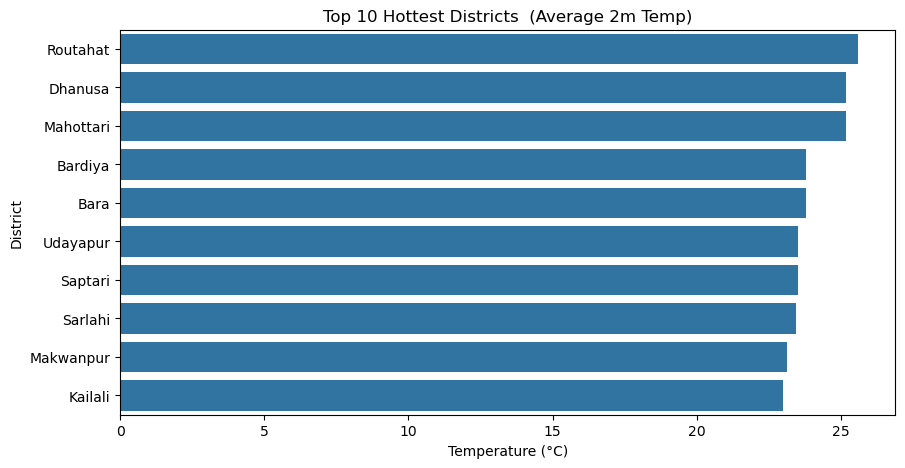

In [52]:
# Average Temperature by District 
district_avg_temp = df.groupby('District')['Temp_2m'].mean().sort_values(ascending= False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x = district_avg_temp.values, y = district_avg_temp.index)
plt.title('Top 10 Hottest Districts  (Average 2m Temp)')
plt.xlabel('Temperature (°C)')
plt.show()

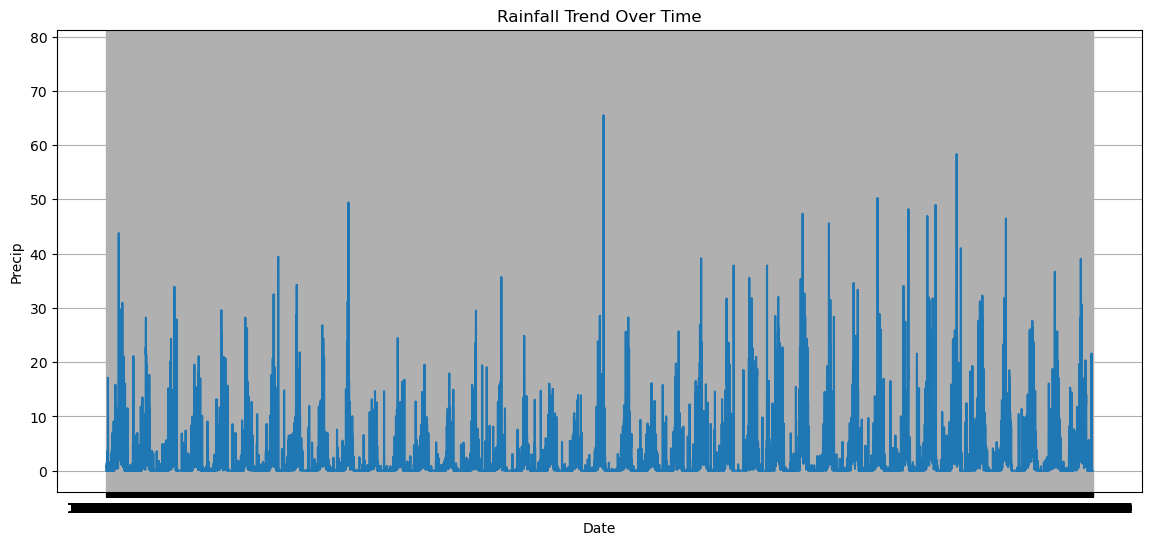

In [53]:
# Rainfall Trend Over Time 
plt.figure(figsize= (14, 6))
sns.lineplot(data = df, x = 'Date', y = 'Precip' )
plt.title('Rainfall Trend Over Time')
plt.grid(True)
plt.show()

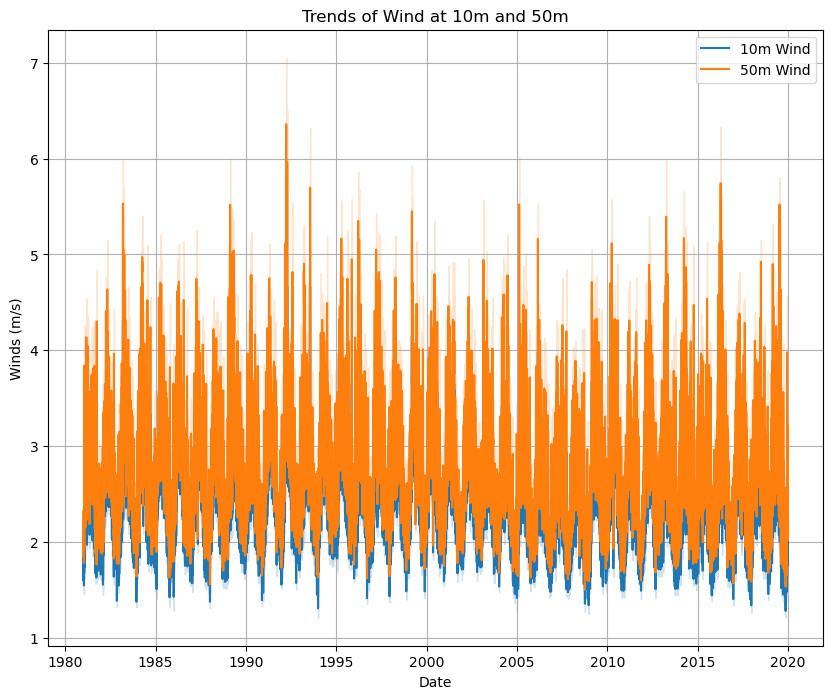

In [35]:
# Trends of Wind Speed 
plt.figure(figsize = (10, 8))
sns.lineplot(data= df, x = 'Date', y = 'WindSpeed_10m', label = '10m Wind')
sns.lineplot(data = df, x = 'Date',y = 'WindSpeed_50m', label = '50m Wind')
plt.title('Trends of Wind at 10m and 50m')
plt.ylabel('Winds (m/s)')
plt.legend()
plt.grid(True)
plt.show()

## Extracting Year and Month from Date 
- Save it in processed data 

In [54]:
#Convert the Date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month 


In [55]:
# Save to processed file
df.to_csv('/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/nepal_daily_climate_with_month_year.csv', index=False)

# Optional check
print(df[['Date', 'Year', 'Month']].head())

        Date  Year  Month
0 1981-01-01  1981      1
1 1981-01-02  1981      1
2 1981-01-03  1981      1
3 1981-01-04  1981      1
4 1981-01-05  1981      1


In [58]:
# Load Processed dataset 
Processed_df = pd.read_csv('/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/nepal_daily_climate_with_month_year.csv')

In [59]:
print(Processed_df.columns)

Index(['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m', 'Year', 'Month'],
      dtype='object')


### Sample datasets to upload in Github 
- Use engineered datsets as base and get sample off of it. 




In [9]:
engineered_df = pd.read_csv("/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/nepal_daily_climate_engineered.csv")
sample_df = engineered_df.head()
sample_df.to_csv("/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/sample_nepal_climate.csv", index = False)